# Stable/Unstable Comparisons

We want to explore which nodes are being classified as stable or unstable across different graphs. The first thing to do is check what proportion of nodes are "stable" or "unstable" in the experiments that have been run.

NOTE: In the training labels, 0 means "stable" and 1 means "unstable".

In [2]:
import pandas as pd
import numpy as np

## Initial Experiments

First, check the stable/unstable ratio for the initial experiment for each algorithm.

In [5]:
'''
Import first CSV files
'''

lv_data = pd.read_csv('../LFR_Graph_Data/Louvain_Data/node_y_train.csv', index_col=0)
im_data = pd.read_csv('../LFR_Graph_Data/Infomap_Data/node_y_train.csv', index_col=0)
gn_data = pd.read_csv('../LFR_Graph_Data/GN_Data/node_y_train.csv', index_col=0)
lpa_data = pd.read_csv('../LFR_Graph_Data/LPA_Data/node_y_train.csv', index_col=0)

In [6]:
'''
Check stable/unstable splits for the initial experiments
'''

def print_values(data):
    value_counts = data['Stability'].value_counts()
    stable_nodes = value_counts[0]
    unstable_nodes = value_counts[1]
    prop = unstable_nodes / len(data) * 100
    print('Unstable:', unstable_nodes, 'Stable:', stable_nodes)
    print('{0:.1f}% Unstable'.format(prop))


print('Initial Louvain:')
print_values(lv_data)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Initial Infomap:')
print_values(im_data)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Initial Girvan-Newman:')
print_values(gn_data)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Initial Label Propagation:')
print_values(lpa_data)

Initial Louvain:
Unstable: 962 Stable: 2238
30.1% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initial Infomap:
Unstable: 320 Stable: 2880
10.0% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initial Girvan-Newman:
Unstable: 657 Stable: 2543
20.5% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Initial Label Propagation:
Unstable: 2014 Stable: 1186
62.9% Unstable


## Repeat Experiments

Now, check how this changes when we repeat the experiment. This data comes from generating new runs of the algorithm on the same, original LFR graphs.

There are no repeats of the LPA algorithm yet.

In [7]:
'''
Check stable/unstable splits for repeats of the experiment
'''

algos = ['Louvain', 'Infomap', 'GN', 'LPA']
for algo in algos:
    print('Further', algo, ':')
    for i in [1,2,3,4]:
        data = pd.read_csv('../LFR_Graph_Data/Repeat_Data/' + algo + '_Data_{0}/node_y_train.csv'.format(i))
        print_values(data)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Further Louvain :
Unstable: 962 Stable: 2238
30.1% Unstable
Unstable: 960 Stable: 2240
30.0% Unstable
Unstable: 963 Stable: 2237
30.1% Unstable
Unstable: 962 Stable: 2238
30.1% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Further Infomap :
Unstable: 320 Stable: 2880
10.0% Unstable
Unstable: 320 Stable: 2880
10.0% Unstable
Unstable: 320 Stable: 2880
10.0% Unstable
Unstable: 320 Stable: 2880
10.0% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Further GN :
Unstable: 657 Stable: 2543
20.5% Unstable
Unstable: 657 Stable: 2543
20.5% Unstable
Unstable: 657 Stable: 2543
20.5% Unstable
Unstable: 657 Stable: 2543
20.5% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Further LPA :
Unstable: 1976 Stable: 1224
61.8% Unstable
Unstable: 2009 Stable: 1191
62.8% Unstable
Unstable: 1994 Stable: 1206
62.3% Unstable
Unstable: 2013 Stable: 1187
62.9% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Experiments on Further Graphs

Finally, check the ratios of stable/unstable nodes on the other sets of LFR graphs.

Again, the LPA algorithm has not yet been run on these.

In [8]:
'''
Check stable/unstable splits for the other LFR graph sets
'''

algos = ['Louvain', 'Infomap', 'GN', 'LPA']
for algo in algos:
    print(algo, 'On Other Graphs:')
    for i in [1,2,3,4]:
        data = pd.read_csv('../Repeat_Graph_Data/LFR_Graphs_{0}/'.format(i) + algo + '_Data/node_y_train.csv')
        print_values(data)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Louvain On Other Graphs:
Unstable: 922 Stable: 2278
28.8% Unstable
Unstable: 914 Stable: 2286
28.6% Unstable
Unstable: 916 Stable: 2284
28.6% Unstable
Unstable: 944 Stable: 2256
29.5% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Infomap On Other Graphs:
Unstable: 160 Stable: 3040
5.0% Unstable
Unstable: 320 Stable: 2880
10.0% Unstable
Unstable: 320 Stable: 2880
10.0% Unstable
Unstable: 392 Stable: 2808
12.2% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
GN On Other Graphs:
Unstable: 657 Stable: 2543
20.5% Unstable
Unstable: 657 Stable: 2543
20.5% Unstable
Unstable: 657 Stable: 2543
20.5% Unstable
Unstable: 657 Stable: 2543
20.5% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LPA On Other Graphs:
Unstable: 2028 Stable: 1172
63.4% Unstable
Unstable: 2195 Stable: 1005
68.6% Unstable
Unstable: 1993 Stable: 1207
62.3% Unstable
Unstable: 1999 Stable: 1201
62.5% Unstable
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


# Comparing Stability Across Algorithms

Now we wish to compare how stable the node stays across algorithms. Note that the above propotions were calculated for the train set only, but since the train-test split is stratified, this proportion also applies to the whole dataset (including test set).

For comparing across algorithms, we will need to recombine the train & test sets, since the nodes included in the train set are different each time. The train set had to be composed of different nodes each time, since the classification labels varied between experiments and the train-test split was stratified each time.

In [69]:
'''
Import data for each algorithm and combine
'''

lv_train_data = pd.read_csv('../LFR_Graph_Data/Louvain_Data/node_y_train.csv', index_col=0)
lv_test_data = pd.read_csv('../LFR_Graph_Data/Louvain_Data/node_y_test.csv', index_col=0)
lv_data = pd.concat([lv_train_data, lv_test_data])

im_train_data = pd.read_csv('../LFR_Graph_Data/Infomap_Data/node_y_train.csv', index_col=0)
im_test_data = pd.read_csv('../LFR_Graph_Data/Infomap_Data/node_y_test.csv', index_col=0)
im_data = pd.concat([im_train_data, im_test_data])

gn_train_data = pd.read_csv('../LFR_Graph_Data/GN_Data/node_y_train.csv', index_col=0)
gn_test_data = pd.read_csv('../LFR_Graph_Data/GN_Data/node_y_test.csv', index_col=0)
gn_data = pd.concat([gn_train_data, gn_test_data])

lpa_train_data = pd.read_csv('../LFR_Graph_Data/LPA_Data/node_y_train.csv', index_col=0)
lpa_test_data = pd.read_csv('../LFR_Graph_Data/LPA_Data/node_y_test.csv', index_col=0)
lpa_data = pd.concat([lpa_train_data, lpa_test_data])

In [70]:
'''
Make table for stability across algorithms
'''

node_indices = []
node_stability = {'Louvain Stability': [],
                  'Infomap Stability': [],
                  'GN Stability': [],
                  'LPA Stability': []}

for mu in [1,2,3,4]:
    for g in [1,2,3,4,5]:
        for node in range(200):
            node_name = 'graph_{0}_{1}_node_{2}'.format(mu, g, node)
            node_indices.append(node_name)
            node_stability['Louvain Stability'].append(lv_data.loc[node_name]['Stability'])
            node_stability['Infomap Stability'].append(im_data.loc[node_name]['Stability'])
            node_stability['GN Stability'].append(gn_data.loc[node_name]['Stability'])
            node_stability['LPA Stability'].append(lpa_data.loc[node_name]['Stability'])
            
stability_table = pd.DataFrame(node_stability, columns=node_stability.keys(), index=node_indices)

In [71]:
'''
Show a random sample from the stability table

NOTE: 0 means stable, 1 means unstable
'''

stability_table.sample(n=20)

,Louvain Stability,Infomap Stability,GN Stability,LPA Stability
graph_2_5_node_122,0,0,0,1
graph_4_5_node_6,1,0,1,1
graph_4_3_node_149,1,0,1,1
graph_4_3_node_35,1,0,1,1
graph_1_2_node_58,0,0,0,0
graph_2_2_node_21,0,0,0,1
graph_4_2_node_141,1,1,1,1
graph_2_3_node_139,0,0,0,0
graph_2_3_node_61,0,0,0,0
graph_1_5_node_39,0,0,0,0


## Stability Histogram

Finally, to compare the stability across multiple algorithms, we will plot a histogram showing the average stability across the 4 algorithms.

Note than an average of 4 binary values can only come to 5 possible values: 0, 0.25, 0.5, 0.75, 1, hence there are only 5 bins in the histogram.

In [72]:
stability_table['Mean'] = stability_table.mean(numeric_only=True, axis=1)

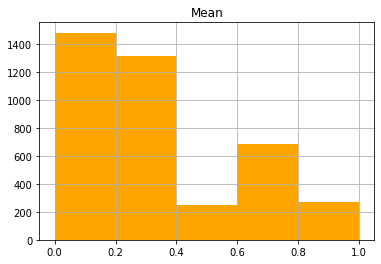

In [74]:
hist = stability_table.hist(bins=5, column='Mean', color='orange')

The second bin probably represents nodes that were stable for Louvain, Infomap and Girvan-Newman, but not the LPA algorithm, as this is significantly less stable. If we exclude the LPA algorithm, we get the following histogram. This time there are only 4 bins, for similar reasons to the above.

In [80]:
stability_table_no_lpa = stability_table.copy().drop(['LPA Stability', 'Mean'], axis=1)

In [81]:
stability_table_no_lpa['Mean'] = stability_table_no_lpa.mean(numeric_only=True, axis=1)

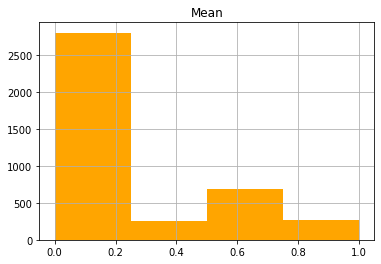

In [83]:
hist = stability_table_no_lpa.hist(bins=4, column='Mean', color='orange')